In [175]:
import pandas as pd
import numpy as np
import requests
import json
from pathlib import Path

In [176]:
# API Request

# Endpoint
jet_fuel_price_data = 'http://api.eia.gov/series/?api_key=6OerksEg68hMpcXhk6UrjNzXGKPBpEf6KombS4OS&series_id=PET.EER_EPJK_PF4_RGC_DPG.D'

# Fetch the data
response = requests.get(jet_fuel_price_data).json()

# Display the data
# jfl = json.dumps(response, indent = 4)

In [ ]:
print(response)

In [178]:
type(response)

dict

In [179]:
response.keys()

dict_keys(['request', 'series'])

In [ ]:
response['series']

In [181]:
test = response['series']

In [182]:
type(test)

list

In [ ]:
test

In [184]:
type(test[0])

dict

In [185]:
df_jf = pd.DataFrame(test[0]['data'])

In [186]:
df_jf

,0,1
0,20220712,3.518
1,20220711,3.607
2,20220708,3.524
3,20220707,3.500
4,20220706,3.246
...,...,...
8126,19900406,0.536
8127,19900405,0.540
8128,19900404,0.560
8129,19900403,0.555


In [187]:
df_jf.dtypes


0     object
1    float64
dtype: object

In [188]:
import datetime

In [189]:
df_jf[0]

0       20220712
1       20220711
2       20220708
3       20220707
4       20220706
          ...   
8126    19900406
8127    19900405
8128    19900404
8129    19900403
8130    19900402
Name: 0, Length: 8131, dtype: object

In [190]:
df_jf[0] = pd.to_datetime(df_jf[0])

In [191]:
df_jf.dtypes

0    datetime64[ns]
1           float64
dtype: object

In [192]:
df_jf

,0,1
0,2022-07-12,3.518
1,2022-07-11,3.607
2,2022-07-08,3.524
3,2022-07-07,3.500
4,2022-07-06,3.246
...,...,...
8126,1990-04-06,0.536
8127,1990-04-05,0.540
8128,1990-04-04,0.560
8129,1990-04-03,0.555


In [193]:
# df.rename(columns={"A": "a", "B": "c"})
df_jf.rename(columns={0 : 'date', 1 : 'jf_price'}, inplace = True)

In [194]:
df_jf.head()

,date,jf_price
0,2022-07-12,3.518
1,2022-07-11,3.607
2,2022-07-08,3.524
3,2022-07-07,3.500
4,2022-07-06,3.246


In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
save_path = Path('SAVE_5_YEAR.csv')

# Read in data and index by date
save_data = pd.read_csv(
    save_path, 
    index_col='Date',     
    parse_dates=True, 
    infer_datetime_format=True
)
save_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-17,52.980000,53.840000,52.740002,53.400002,53.400002,1420600
2017-07-18,53.000000,53.439999,51.610001,52.060001,52.060001,2016000
2017-07-19,51.970001,52.259998,51.209999,51.950001,51.950001,1755400
2017-07-20,51.910000,52.040001,50.439999,50.570000,50.570000,1216900
2017-07-21,50.500000,50.700001,49.360001,50.119999,50.119999,1237300
...,...,...,...,...,...,...
2022-07-08,24.280001,25.110001,24.280001,24.900000,24.900000,3011000
2022-07-11,24.600000,24.690001,24.219999,24.410000,24.410000,1503000
2022-07-12,24.740000,25.000000,24.080000,24.170000,24.170000,2135500


In [197]:
save_data = save_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [198]:
save_data.head()

,Close
Date,
2017-07-17,53.400002
2017-07-18,52.060001
2017-07-19,51.950001
2017-07-20,50.570000
2017-07-21,50.119999


In [199]:
save_data.dtypes

Close    float64
dtype: object

In [200]:
df_jf.head()

,date,jf_price
0,2022-07-12,3.518
1,2022-07-11,3.607
2,2022-07-08,3.524
3,2022-07-07,3.500
4,2022-07-06,3.246


In [201]:
df_jf.set_index('date', inplace = True)

In [202]:
df_jf.head()

,jf_price
date,
2022-07-12,3.518
2022-07-11,3.607
2022-07-08,3.524
2022-07-07,3.500
2022-07-06,3.246


In [203]:
save_data.head()

,Close
Date,
2017-07-17,53.400002
2017-07-18,52.060001
2017-07-19,51.950001
2017-07-20,50.570000
2017-07-21,50.119999


In [204]:
save_data.index

DatetimeIndex(['2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20',
               '2017-07-21', '2017-07-24', '2017-07-25', '2017-07-26',
               '2017-07-27', '2017-07-28',
               ...
               '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [205]:
df_jf.index

DatetimeIndex(['2022-07-12', '2022-07-11', '2022-07-08', '2022-07-07',
               '2022-07-06', '2022-07-05', '2022-07-01', '2022-06-30',
               '2022-06-29', '2022-06-28',
               ...
               '1990-04-13', '1990-04-12', '1990-04-11', '1990-04-10',
               '1990-04-09', '1990-04-06', '1990-04-05', '1990-04-04',
               '1990-04-03', '1990-04-02'],
              dtype='datetime64[ns]', name='date', length=8131, freq=None)

In [206]:
df = df_jf.join(save_data)

In [207]:
df.dropna(inplace=True)

In [208]:
df.shape

(1247, 2)

In [209]:
df.head(25)

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
2022-07-05,3.411,24.139999
2022-07-01,3.779,24.549999
2022-06-30,3.753,23.840000
2022-06-29,3.872,22.410000


In [210]:
import matplotlib.pyplot as plt

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

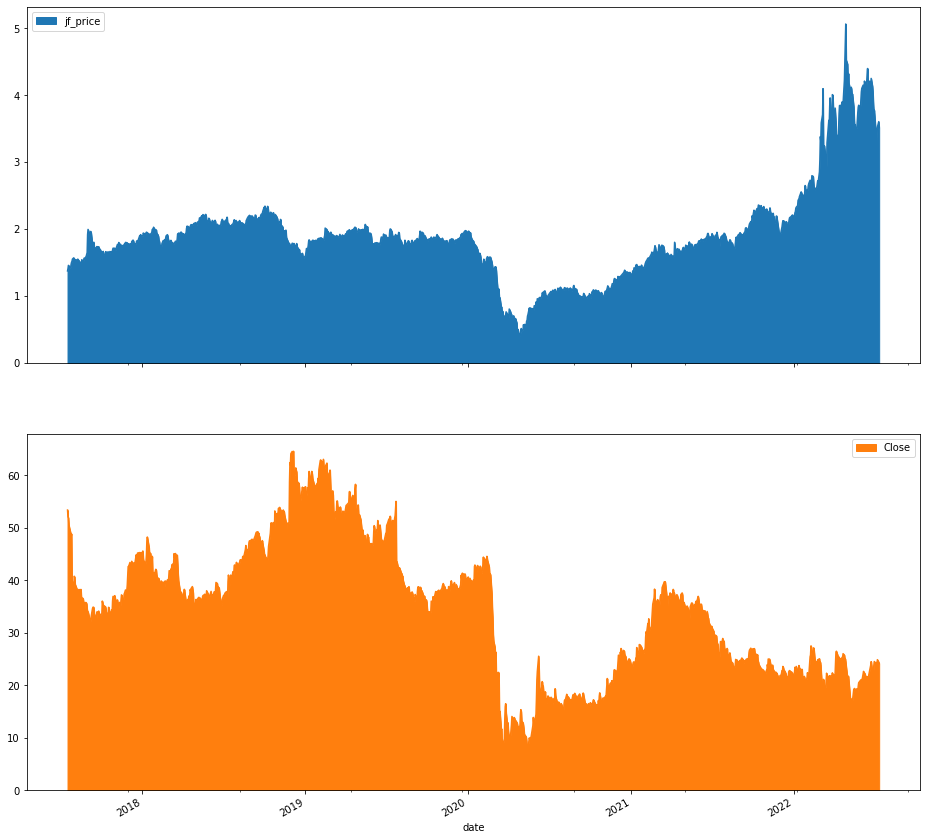

In [211]:
df.plot.area(figsize=(16, 16), subplots=True)

<AxesSubplot:title={'center':'Correlation Matrix'}>

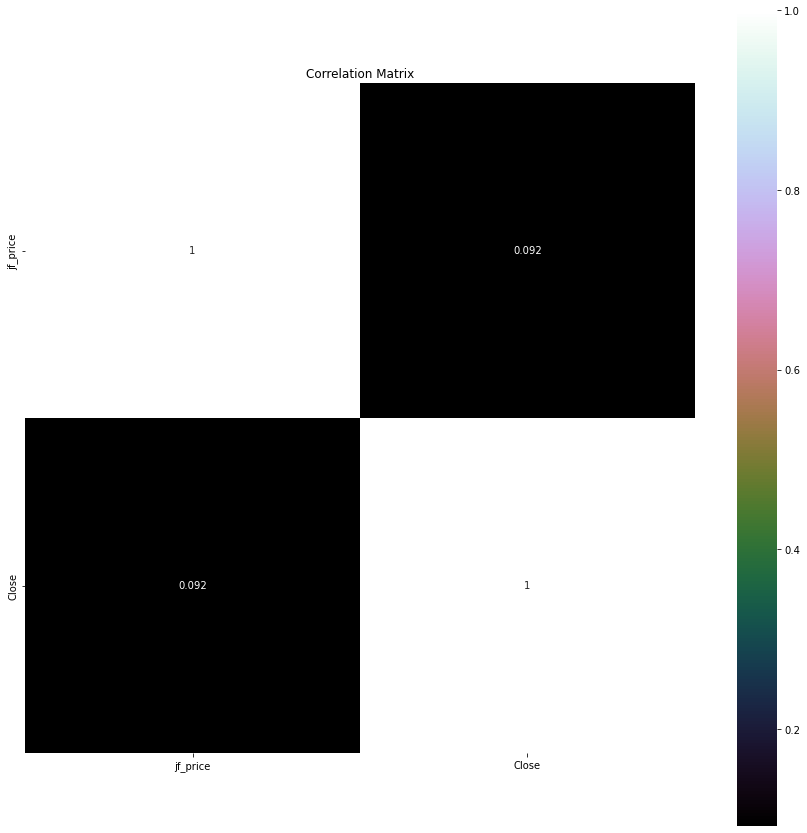

In [212]:
import seaborn as sns
correlate = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlate, vmax =1, square=True, annot=True, cmap='cubehelix')

In [213]:
X = df[['jf_price', 'Close']].dropna().copy()

X


,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
...,...,...
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001


In [214]:
# Display sample data
display(X.head())
display(X.tail())

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001


,jf_price,Close
date,,
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001
2017-07-18,1.412,52.060001
2017-07-17,1.377,53.400002


In [215]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1247 entries, 2022-07-12 to 2017-07-17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   jf_price  1247 non-null   float64
 1   Close     1247 non-null   float64
dtypes: float64(2)
memory usage: 29.2 KB


In [216]:
X

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
...,...,...
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001


In [217]:
y = df['Close'].copy()
y

date
2022-07-12    24.170000
2022-07-11    24.410000
2022-07-08    24.900000
2022-07-07    23.889999
2022-07-06    24.360001
                ...    
2017-07-21    50.119999
2017-07-20    50.570000
2017-07-19    51.950001
2017-07-18    52.060001
2017-07-17    53.400002
Name: Close, Length: 1247, dtype: float64

In [218]:
from pandas.tseries.offsets import DateOffset


In [219]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

# Select the ending period for the training data with an offset of 3 months
training_end = training_begin + DateOffset(months=36)

# Display the training end date
print(training_end)

2017-07-17 00:00:00
2020-07-17 00:00:00


In [220]:
X

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
...,...,...
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001


In [221]:
# Generate the X_train and y_train DataFrames
X_train = X.loc['2017-07-17':'2020-07-17']
y_train = y.loc['2017-07-17':'2020-07-17']

# Display sample data
X_train.tail()

,jf_price,Close
date,,
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001
2017-07-18,1.412,52.060001
2017-07-17,1.377,53.400002


In [222]:
# Generate the X_test and y_test DataFrames
X_test = X.loc['2020-07-17':'2022-07-17']
y_test = y.loc['2020-07-17':'2022-07-17']

# Display sample data
X_test.head()

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001


In [223]:
# Import the required module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X_train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [224]:
"""
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

# Initiate the model instance
logistic_regression_model = LogisticRegression()
"""

'\n# Import a new classifier from SKLearn\nfrom sklearn.linear_model import LogisticRegression\n\n# Initiate the model instance\nlogistic_regression_model = LogisticRegression()\n'

In [225]:
"""
# Fit the model using the training data
model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]
"""

"\n# Fit the model using the training data\nmodel = logistic_regression_model.fit(X_train_scaled, y_train)\n\n# Use the testing dataset to generate the predictions for the new model\npred = logistic_regression_model.predict(X_test_scaled)\n\n# Review the model's predicted values\npred[:10]\n"

In [226]:
# Import the SVM model
from sklearn import svm

In [228]:
# Create the classifier model
svm_model = svm.SVR()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([18.12997687, 18.5215074 , 19.79423989, 18.03168383, 17.60453065,
       18.40265028, 17.21332942, 17.61060204, 17.59906532, 18.33539643])

In [229]:
# Import the required module
from sklearn.metrics import classification_report

# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

ValueError: continuous is not supported